# Lineare Regression 1D

<p>In dieses &Uuml;bung wird eine zuf&auml;llige Punkteverteilung erzeugt, f&uuml;r die eine Approximation mittels einer Geraden gesucht wird. Zu Beginn sind die Parameter theta0 (y-Achsenabschnitt) und theta1 (Steigung) der Geraden zuf&auml;llig gesetzt. Danach werden sie mit dem Gradientenverfahren ge&auml;ndert.</p>

<p>Sie k&ouml;nnen das hier gezeigte Jupyter Notebook <a href="http://home.htw-berlin.de/~hezel/computervision/WS1718/uebung1/LinearRegression_1D_Vorlage.ipynb" target="_blank">downloaden</a>&nbsp;und auf ihren eigenen Rechner ausf&uuml;hren.</p>

<hr />

<h2>Einleitung</h2>

<p>Zun&auml;chst wird numpy f&uuml;r den Umgang und matplot zum Plotten von Matrizen importiert. Danach wird der Zufallsgenerator von Numpy geseedet und die Anzahl an Punkte die sp&auml;ter erzeugt werden soll festgelegt.</p>


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# enable interactive plots
%matplotlib notebook

np.random.seed(7) 
num_points = 100

Die nachfolgenden Methoden sind zum Plotten der Datenpunkte und der approximierten Geraden, sowie dem berechnen des Approximationsfehlers. 

In [6]:
def make_plot(x, y, prediction): 
    fig = plt.figure(figsize = (8,6))   
    
    ax = fig.add_subplot(1, 1, 1)
    ax.axis([-2, 2, 0.1, 0.6])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
    dots, = ax.plot(x, y, 'ro')
    line, = ax.plot(x, prediction)
    return fig, dots, line

def show_plot(x, y, prediction): 
    fig, dots, line = make_plot(x, y, prediction)
    fig.tight_layout()
    plt.show(fig)    
    
def calc_error(y, prediction):
    d = y - prediction
    d = np.square(d)
    e = np.sum(d)
    return e

Die eigentlichen Datenpunkte werden zufällig erzeugt, dabei wird eine Gauß-Verteilung verwendet.

In [7]:
# random data array
x = np.zeros(num_points, dtype=np.float32) 
y = np.zeros(num_points, dtype=np.float32)

for i in range(num_points):
    x[i] = np.random.normal(0.0, 0.55)
    y[i] = x[i] * 0.1 + 0.3 + np.random.normal(0.0, 0.03)

Der Y-Achsenabschnitt (t0) und die Steigung (t1) von einer Geradengleichung werden festgelegt. Diese Gleichung wird verwendet um für jeden X-Wert einen entsprechenden Y-Wert auszurechnen, die zusammen eine Gerade formen. Da t0 und t2 willkührlich ausgewählt wurden approximiert die entstandene Line die zufälligen Datenpunkte X,Y eher schlecht. 

In [8]:
# initiale theta-Werte
t0 =  0.4
t1 = -0.3 

# prediction
y_pred = t0 + t1*x

# print results
print("error:", calc_error(y, y_pred))
show_plot(x, y, y_pred)

error: 5.77517


<IPython.core.display.Javascript object>

TypeError: show() takes 0 positional arguments but 1 was given

<hr />
<h2><span class="marker"><strong>Aufgabe</strong></span></h2>

<p><span class="marker">Im n&auml;chsten Abschnitt sollen die Theta Werte (t0 und t1) durch das&nbsp;</span>Gradientenverfahren&nbsp;angepasst werden. Implementieren sie die partielle Ableitung f&uuml;r t0 und t1, aktualisieren sie danach diese Werte und geben sie den neuen Pr&auml;diktionsfehler aus. Erstellen sie eine neue approximations Gerade und speichern sie dessen X-Werte im predictions array.</p>

In [9]:
# initiale theta-Werte
t0 =  0.4
t1 = -0.3 

# learn rate
alpha = 0.5 / num_points 

# predictions per iteration
predictions = []

# train for 30 iterations
for i in range(30):
    
    # TODO prediction
    y_pred = t0 + t1*x
    
    # TODO derivative
    d_t0 = np.sum(y_pred - y)
    d_t1 = np.sum((y_pred - y) * x)

    # TODO update theta
    t0 = t0 - alpha * d_t0
    t1 = t1 - alpha * d_t1

    # print error
    print("{:2d} error: {:5.3f}".format(i, calc_error(y, y_pred)))
    
    # remember the current predictions 
    predictions.append(y_pred)

 0 error: 5.775
 1 error: 3.687
 2 error: 2.591
 3 error: 1.893
 4 error: 1.408
 5 error: 1.058
 6 error: 0.802
 7 error: 0.614
 8 error: 0.476
 9 error: 0.374
10 error: 0.300
11 error: 0.245
12 error: 0.204
13 error: 0.175
14 error: 0.153
15 error: 0.137
16 error: 0.125
17 error: 0.116
18 error: 0.110
19 error: 0.105
20 error: 0.101
21 error: 0.099
22 error: 0.097
23 error: 0.096
24 error: 0.095
25 error: 0.094
26 error: 0.093
27 error: 0.093
28 error: 0.093
29 error: 0.092


Die berechneten Geraden können über ein interaktives Diagramm betrachtet werden. Da in Python imports jeder Zeit möglich sind, wird das Slider-Widges von matplotlib Widges importiert und ein Plot erstellt der über einen Slider die Geraden der verschiedenen Iterationen anzeigt. 

<IPython.core.display.Javascript object>


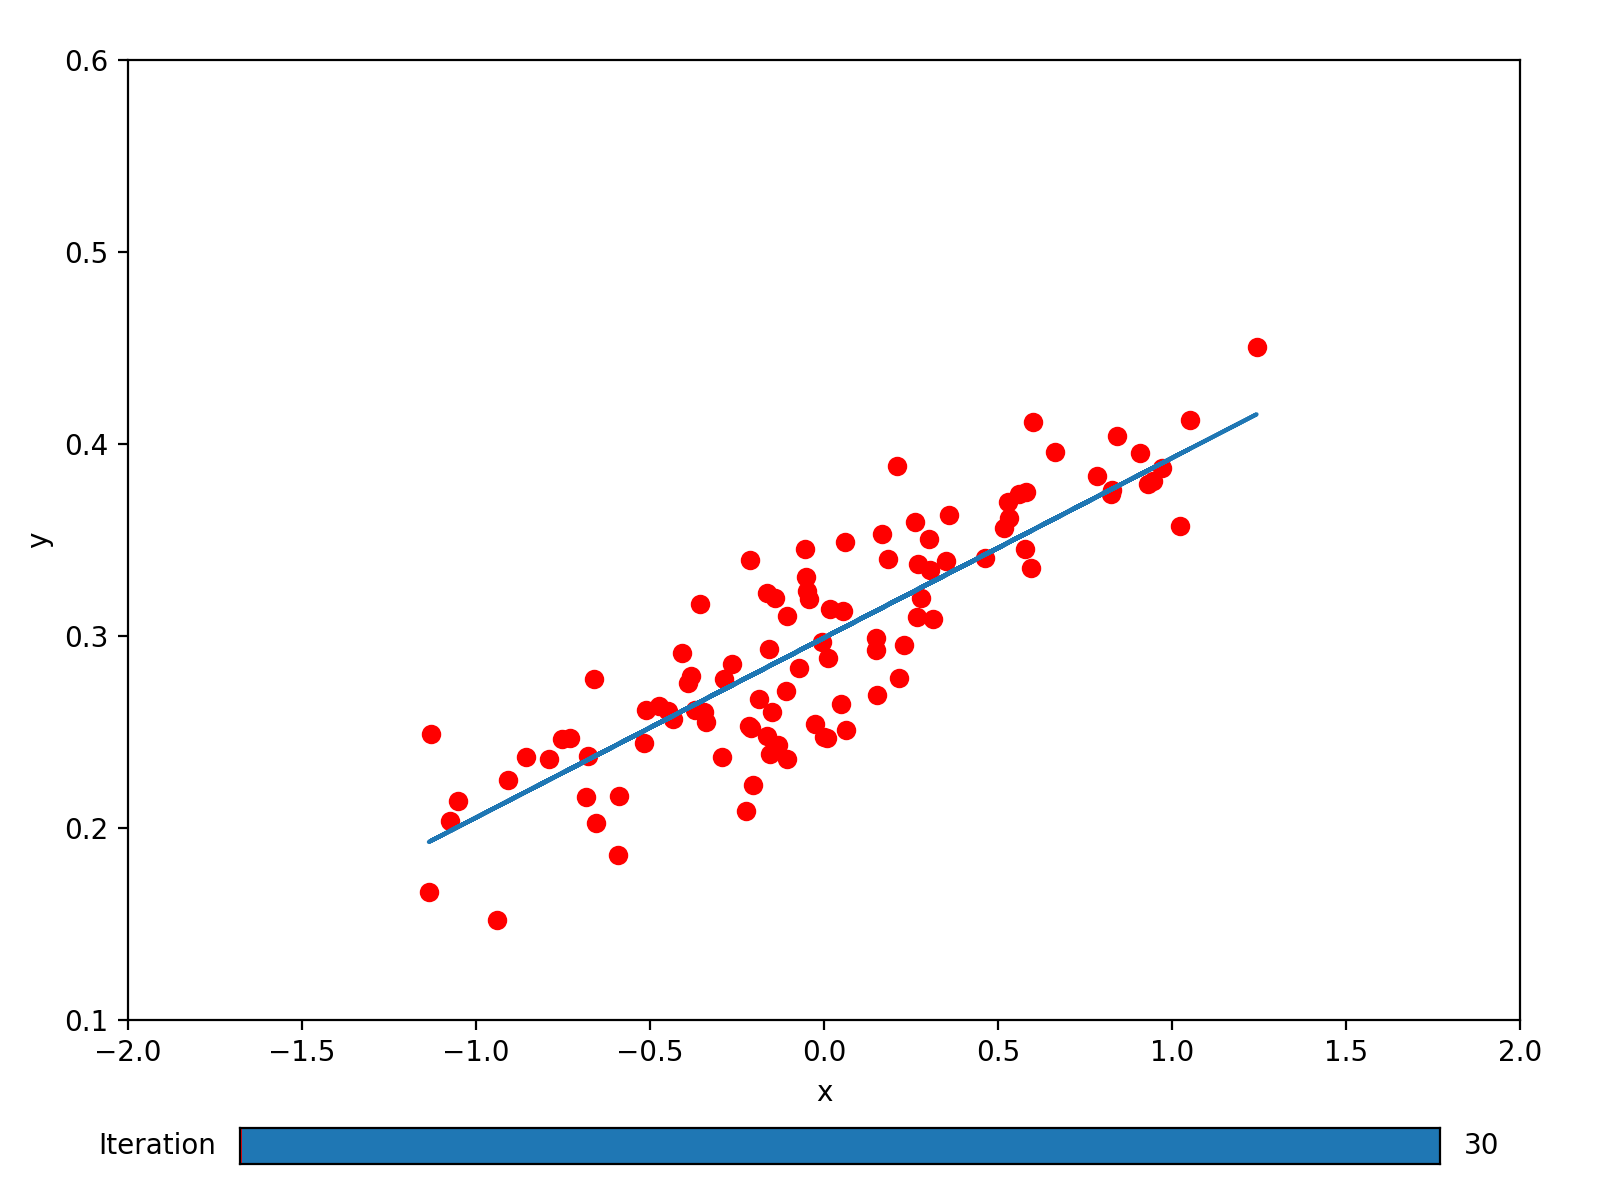

In [10]:
from matplotlib.widgets import Slider

fig, dots, line = make_plot(x, y, predictions[0])
plt.subplots_adjust(left=0.08, right=0.95, top=0.95, bottom=0.15)

sliderPos = plt.axes([0.15, 0.03, 0.75, 0.03])
iterationSlider = Slider(sliderPos, 'Iteration', 0, len(predictions), valfmt="%d",valinit=0)

def update(x):
    line.set_ydata(predictions[int(x)])
    fig.canvas.draw_idle()
iterationSlider.on_changed(update)

plt.show()

<hr />
<h2>Ergebnis</h2>

<p>Nachdem die Theta Werte angepasst wurden, k&ouml;nnte der Ergebnisplot wie folgt aussehen:</p>

<p><img alt="" src="http://home.htw-berlin.de/~hezel/computervision/WS1718/uebung1/LinearRegression_1D_Result.png" style="height:590px; width:777px" /></p>


<p>&nbsp;</p>

<hr />
<p>&nbsp;</p>

<h2>Abgabe</h2>

<p>Das von ihnen erstellte Notebook muss sp&auml;testens bis zum 19. November 2017 um 23:59 UTC+1 per E-Mail an&nbsp;<a href="mailto:hezel@htw-berlin.de" target="_blank">hezel@htw-berlin.de</a>&nbsp;eingesendet werden. Verwenden sie als Betreff bitte &quot;CV1718 &Uuml;bung1 &lt;NAME&gt;&quot; und als Notebook Name &quot;CV1718_Ue1_LinearRegression_1D_NAME.ipynb&quot;. Bevor sie mir eine Mail schicken, entfernen sie bitte &uuml;ber &quot;Kernel&quot; -&gt; &quot;Restart and Clear Output&quot; s&auml;mtlichen von Python erstellten Inhalt und speichern anschlie&szlig;end das Notebook &quot;File&quot; -&gt; &quot;Save and Checkpoint&quot; erneut ab.</p>
